# Initial import and exploring the image dataset

In [1]:
TRAIN_DIR='dataset/train'
VALIDATION_DIR='dataset/valid'
TEST_DIR='dataset/test'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.applications.xception import Xception
import tensorflow.keras.applications
import tensorflow.keras.applications.xception 
import tensorflow.keras.applications.resnet
import tensorflow.keras.applications.vgg16
import tensorflow.keras.applications.inception_v3


In [4]:
from tensorflow.keras.preprocessing.image import load_img

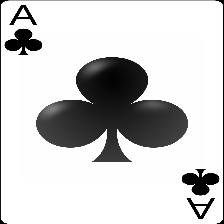

In [5]:
path=TRAIN_DIR
name='ace of clubs/003.jpg'
fullname=f'{path}/{name}'
load_img(fullname)

The properties is 224 X 224 X 3 jpg format

In [14]:
img = load_img(fullname, target_size=(299, 299))

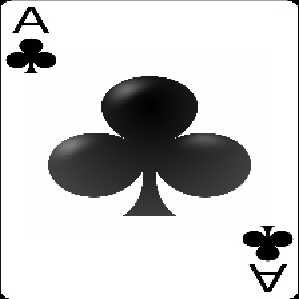

In [15]:
img

In [16]:
x = np.array(img)
x.shape

(299, 299, 3)

In [17]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [18]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [19]:
X = np.array([x])

In [20]:
X = preprocess_input(X)

In [21]:
pred = model.predict(X)

2023-12-19 03:22:39.255506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-12-19 03:22:39.480300: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 1s 1s/step


2023-12-19 03:22:40.102606: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [22]:
decode_predictions(pred)

[[('n03602883', 'joystick', 0.10137536),
  ('n06359193', 'web_site', 0.050469246),
  ('n03314780', 'face_powder', 0.036657695),
  ('n03532672', 'hook', 0.025323061),
  ('n03691459', 'loudspeaker', 0.02434306)]]

## Inital image preparation, making model with Xception

In [11]:

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


I have tried several agumentaions, but now try without them

Some summary for results is below first fit


In [80]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=preprocess_input
    # rotation_range=15,
    # width_shift_range=0.05,
    # height_shift_range=0.05,
    # shear_range=0.1,
    # zoom_range=0.05,
    # horizontal_flip=True,
    # vertical_flip=True,
    # fill_mode='nearest'                              
                              )

# The properties is 224 X 224 X 3 jpg format

train_ds = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=32
)

Found 7624 images belonging to 53 classes.


In [81]:
# train_ds.class_indices

In [82]:
val_gen = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=preprocess_input
                            )

val_ds = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 265 images belonging to 53 classes.


In [83]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

size_inner=106
droprate=0.03

inputs = keras.Input(shape=(224, 224, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

# inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

# drop = keras.layers.Dropout(droprate)(inner)

outputs = keras.layers.Dense(53)(vectors)

model = keras.Model(inputs, outputs)

# BIG PART CUT OUT!


## many wrong experiments are in notebook_full.ipynb
please check notebook_full.ipynb to see my step.

maybe i faced some error, but i started with pretrained models, and have done many tunigs, then i compare 4 pretrained models, then i fine tune again, 
but validation accuracy was below 0.7

after that i started from scratch, and results was better from the start:

### note
I have cut a big part of notebook, so i hope everything works, but it not please check the notebook_full.ipynb, it surely works

## New start from simple:


In [152]:
train_datagen_s = ImageDataGenerator(rescale=1./255)
valid_datagen_s = ImageDataGenerator(rescale=1./255)
test_datagen_s = ImageDataGenerator(rescale=1./255)

train_data_s = train_datagen_s.flow_from_directory(TRAIN_DIR,
                                               batch_size=32,  
                                               target_size=(224, 224), 
                                               class_mode="categorical", 
                                               seed=42)

valid_data_s = valid_datagen_s.flow_from_directory(VALIDATION_DIR,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data_s = test_datagen_s.flow_from_directory(TEST_DIR,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

model_s = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=3,
                         activation='relu',
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64,
                         activation='relu', 
                         kernel_size=3),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64,
                         activation='relu', 
                         kernel_size=3),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(53, activation="softmax") 
])


model_s.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_s = model_s.fit(train_data_s,
                        epochs=15,
                        steps_per_epoch=len(train_data_s),
                        validation_data=valid_data_s,
                        validation_steps=len(valid_data_s))



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
 82/239 [=========>....................] - ETA: 7s - loss: 3.6790 - accuracy: 0.0964

KeyboardInterrupt: 

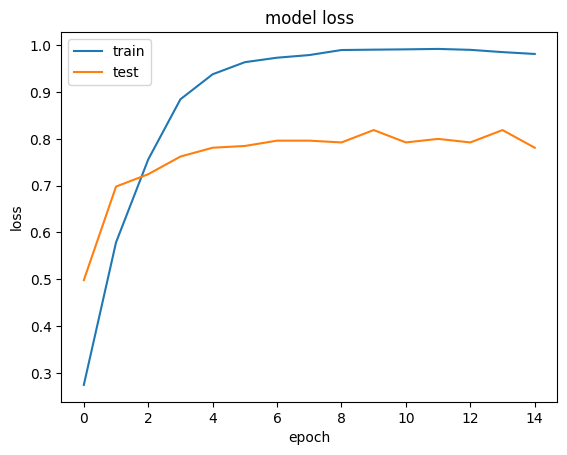

In [77]:
plt.plot(history_s.history['accuracy'])
plt.plot(history_s.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# FANTASTIC ! 

i was going wrong way

Now try to add VGG16 to this code

In [80]:
preprocess_func=keras.applications.vgg16.preprocess_input
base_model=keras.applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


# Freeze convolutional layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


# Create a new model by adding custom dense layers on top of the pre-trained model
model3 = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(53, activation="softmax")
])

# Compile the model
model3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Print model summary to check the architecture
model.summary()

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_80 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d_6 (Gl  (None, 512)               0         
 obalMaxPooling2D)                                               
                                                                 
 dense_81 (Dense)            (None, 1024)              525312    
                                                                 
 dense_82 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_39 (Dropout)        (None, 1024)              0         
                                                          

In [81]:
history = model3.fit(train_data_s,
                    epochs=15,
                    steps_per_epoch=len(train_data_s),
                    validation_data=valid_data_s,
                    validation_steps=len(valid_data_s))

Epoch 1/15
239/239 [==============================] - 25s 101ms/step - loss: 2.1972 - accuracy: 0.4300 - val_loss: 0.8582 - val_accuracy: 0.7660
Epoch 2/15
239/239 [==============================] - 24s 101ms/step - loss: 0.8589 - accuracy: 0.7534 - val_loss: 0.6924 - val_accuracy: 0.8000
Epoch 3/15
239/239 [==============================] - 24s 102ms/step - loss: 0.4288 - accuracy: 0.8757 - val_loss: 0.4807 - val_accuracy: 0.8453
Epoch 4/15
239/239 [==============================] - 24s 101ms/step - loss: 0.2201 - accuracy: 0.9391 - val_loss: 0.4541 - val_accuracy: 0.8755
Epoch 5/15
239/239 [==============================] - 24s 100ms/step - loss: 0.1311 - accuracy: 0.9645 - val_loss: 0.5287 - val_accuracy: 0.8528
Epoch 6/15
239/239 [==============================] - 24s 100ms/step - loss: 0.1183 - accuracy: 0.9643 - val_loss: 0.5921 - val_accuracy: 0.8189
Epoch 7/15
239/239 [==============================] - 24s 100ms/step - loss: 0.1037 - accuracy: 0.9689 - val_loss: 0.4629 - val_ac

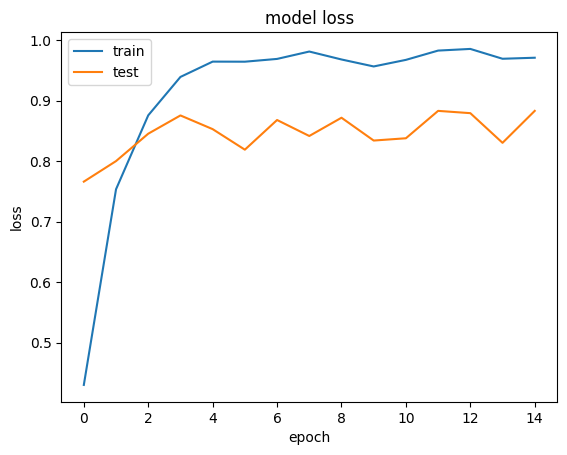

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [154]:
def make_model_v2(learning_rate=0.001,size1=128,size2=128,droprate=None):

    base_model=keras.applications.VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    
    # Freeze convolutional layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False
    
    
    # Create a new model by adding custom dense layers on top of the pre-trained model
    if droprate is None:
        model3 = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(size1, activation="relu"),
            tf.keras.layers.Dense(size2, activation="relu"),
            tf.keras.layers.Dense(53, activation="softmax")
        ])
    else:
        model3 = tf.keras.models.Sequential([
            base_model,
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(size1, activation="relu"),
            tf.keras.layers.Dense(size2, activation="relu"),
            tf.keras.layers.Dropout(droprate),
            tf.keras.layers.Dense(53, activation="softmax")
        ])

        
        
    # Compile the model
    model3.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])
    
    return model3

def datasets_v2(aug=False, batch_size=32, 
                                    rotation_range=0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    shear_range=0,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False, ):
    if aug:
        train_datagen_s = ImageDataGenerator(rescale=1./255,
                                                            rotation_range=rotation_range,
                                                            width_shift_range=width_shift_range,
                                                            height_shift_range=height_shift_range,
                                                            shear_range=shear_range,
                                                            zoom_range=zoom_range,
                                                            horizontal_flip=horizontal_flip,
                                                            vertical_flip=vertical_flip,
                                                            fill_mode='nearest')
    else:
        train_datagen_s = ImageDataGenerator(rescale=1./255)
        
    valid_datagen_s = ImageDataGenerator(rescale=1./255)
    test_datagen_s = ImageDataGenerator(rescale=1./255)

    
    train_data_s = train_datagen_s.flow_from_directory(TRAIN_DIR,
                                                       batch_size=batch_size,  
                                                       target_size=(224, 224), 
                                                       class_mode="categorical", 
                                                       seed=42)        
    
    valid_data_s = valid_datagen_s.flow_from_directory(VALIDATION_DIR,
                                                   batch_size=batch_size,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   seed=42)
    
    test_data_s = test_datagen_s.flow_from_directory(TEST_DIR,
                                                   batch_size=batch_size,
                                                   target_size=(224, 224),
                                                   class_mode="categorical",
                                                   seed=42)
    return train_data_s, valid_data_s, test_data_s




## Doing all again with hyperparams

### Learning rate

In [88]:
epochs=10

scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


for learning_rate_var in [0.01, 0.001, 0.0001]:
    print(learning_rate_var)

    model=make_model_v2(learning_rate=learning_rate_var)
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset))   

    
    print()
    print()



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
0.01
Epoch 1/10
239/239 [==============================] - 25s 101ms/step - loss: 4.1990 - accuracy: 0.0567 - val_loss: 2.9955 - val_accuracy: 0.1208
Epoch 2/10
239/239 [==============================] - 24s 100ms/step - loss: 3.0861 - accuracy: 0.0902 - val_loss: 2.7954 - val_accuracy: 0.1019
Epoch 3/10
239/239 [==============================] - 24s 100ms/step - loss: 2.8984 - accuracy: 0.1114 - val_loss: 2.6858 - val_accuracy: 0.1245
Epoch 4/10
239/239 [==============================] - 24s 100ms/step - loss: 2.8271 - accuracy: 0.1123 - val_loss: 2.6819 - val_accuracy: 0.1321
Epoch 5/10
239/239 [==============================] - 24s 100ms/step - loss: 2.7667 - accuracy: 0.1253 - val_loss: 2.5897 - val_accuracy: 0.1472
Epoch 6/10
239/239 [==============================] - 24s 100ms/step - loss: 2.7376 - accuracy: 0.1291 - val_loss: 2.7279 - val_accuracy: 0.090

In [90]:
learning_rate = 0.001   # is winner


In [92]:
learning_rate = 0.001 
epochs=10

scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


for size1 in [64, 128, 256]:
    print('SIZE1=',size1)
    for size2 in [64, 128, 256]:
        print('SIZE2=',size2)
        model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2)
        history = model.fit(train_dataset,
                            epochs=epochs,
                            steps_per_epoch=len(train_dataset),
                            validation_data=valid_dataset,
                            validation_steps=len(valid_dataset))   
        scores[f's1={str(size1)},s2={str(size2)}']=history.history 
        
        print()
        print()



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
SIZE1= 64
SIZE2= 64
Epoch 1/10
239/239 [==============================] - 26s 105ms/step - loss: 2.7806 - accuracy: 0.2625 - val_loss: 1.4464 - val_accuracy: 0.5434
Epoch 2/10
239/239 [==============================] - 25s 105ms/step - loss: 1.3415 - accuracy: 0.6251 - val_loss: 0.8855 - val_accuracy: 0.7283
Epoch 3/10
239/239 [==============================] - 25s 106ms/step - loss: 0.8242 - accuracy: 0.7614 - val_loss: 0.7167 - val_accuracy: 0.7849
Epoch 4/10
239/239 [==============================] - 26s 108ms/step - loss: 0.5331 - accuracy: 0.8452 - val_loss: 0.5379 - val_accuracy: 0.8151
Epoch 5/10
239/239 [==============================] - 26s 108ms/step - loss: 0.3479 - accuracy: 0.9066 - val_loss: 0.5763 - val_accuracy: 0.8226
Epoch 6/10
239/239 [==============================] - 25s 106ms/step - loss: 0.2203 - accuracy: 0.9416 - val_loss: 0.5793 - val_

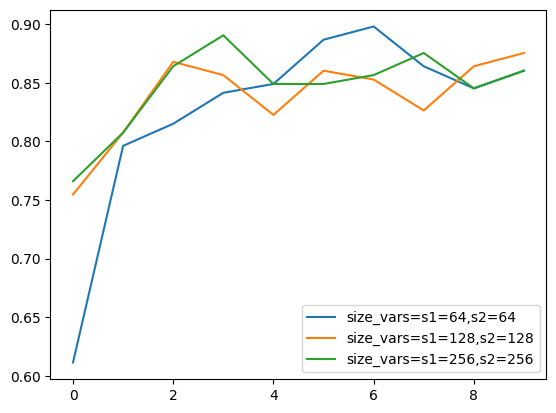

In [93]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))


plt.legend()

In [94]:
learning_rate = 0.001 
epochs=10
size1=128
scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)

print('SIZE1=',size1)
for size2 in [32, 64, 128, 256,512]:
    print('SIZE2=',size2)
    model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2)
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset))   
    scores[f's1={str(size1)},s2={str(size2)}']=history.history 
    
    print()
    print()



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
SIZE1= 128
SIZE2= 32
Epoch 1/10
239/239 [==============================] - 25s 99ms/step - loss: 3.2908 - accuracy: 0.1566 - val_loss: 2.1029 - val_accuracy: 0.3887
Epoch 2/10
239/239 [==============================] - 24s 98ms/step - loss: 1.7350 - accuracy: 0.5349 - val_loss: 1.1592 - val_accuracy: 0.6491
Epoch 3/10
239/239 [==============================] - 24s 98ms/step - loss: 1.0241 - accuracy: 0.7238 - val_loss: 0.7959 - val_accuracy: 0.7774
Epoch 4/10
239/239 [==============================] - 24s 99ms/step - loss: 0.6638 - accuracy: 0.8208 - val_loss: 0.7353 - val_accuracy: 0.7925
Epoch 5/10
239/239 [==============================] - 24s 99ms/step - loss: 0.4435 - accuracy: 0.8818 - val_loss: 0.6682 - val_accuracy: 0.8226
Epoch 6/10
239/239 [==============================] - 23s 98ms/step - loss: 0.2921 - accuracy: 0.9297 - val_loss: 0.6323 - val_accur

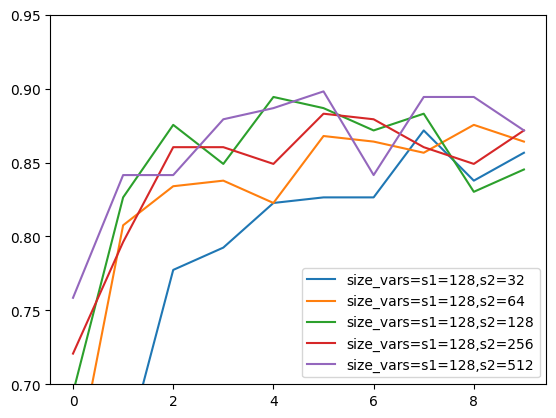

In [96]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))
    
plt.ylim(0.7, 0.95)
plt.legend()

# Checkpointing

seem like reaching to 0.9 in accuracy
So now is the time to do checkpointing

In [153]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'cardmodel_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# history = model.fit(
#     train_ds,
#     epochs=10,
#     validation_data=val_ds,
#     callbacks=[chechpoint]       ##  <- add this line
# )

i will run previous comparision between s2=128 and 512 with checkpointing and more ephochs

In [98]:
learning_rate = 0.001 
epochs=15
size1=128
scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)

print('SIZE1=',size1)
for size2 in [128,256,512]:
    print('SIZE2=',size2)
    model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2)
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset),
                        callbacks=[chechpoint] )   
    scores[f's1={str(size1)},s2={str(size2)}']=history.history 
    
    print()
    print()


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
SIZE1= 128
SIZE2= 128
Epoch 1/15
239/239 [==============================] - 24s 98ms/step - loss: 2.2146 - accuracy: 0.4279 - val_loss: 0.9646 - val_accuracy: 0.7057
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


239/239 [==============================] - 23s 98ms/step - loss: 0.8931 - accuracy: 0.7476 - val_loss: 0.6226 - val_accuracy: 0.8226
Epoch 3/15
239/239 [==============================] - 24s 99ms/step - loss: 0.4542 - accuracy: 0.8690 - val_loss: 0.4181 - val_accuracy: 0.8830
Epoch 4/15
239/239 [==============================] - 24s 98ms/step - loss: 0.2208 - accuracy: 0.9402 - val_loss: 0.4491 - val_accuracy: 0.8679
Epoch 5/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1348 - accuracy: 0.9643 - val_loss: 0.3745 - val_accuracy: 0.8868
Epoch 6/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1194 - accuracy: 0.9646 - val_loss: 0.4220 - val_accuracy: 0.8755
Epoch 7/15
239/239 [==============================] - 23s 98ms/step - loss: 0.0803 - accuracy: 0.9772 - val_loss: 0.4255 - val_accuracy: 0.8868
Epoch 8/15
239/239 [==============================] - 23s 98ms/step - loss: 0.0680 - accuracy: 0.9818 - val_loss: 0.5953 - val_accuracy: 0.8377
Epo

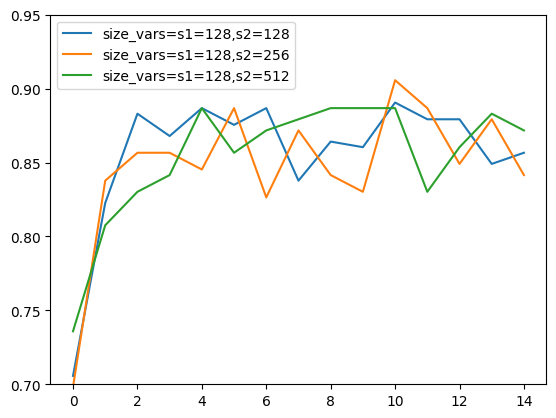

In [99]:
for size_vars, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('size_vars=%s' % size_vars))
    
plt.ylim(0.7, 0.95)
plt.legend()

## Ajusting dropout

In [101]:
scores

{'s1=128,s2=128': {'loss': [2.214620590209961,
   0.8931232690811157,
   0.45418205857276917,
   0.2207789123058319,
   0.13477082550525665,
   0.11935136467218399,
   0.08030067384243011,
   0.06803444772958755,
   0.11821518838405609,
   0.1315479725599289,
   0.10531960427761078,
   0.04720810800790787,
   0.06798014789819717,
   0.07400299608707428,
   0.08030898123979568],
  'accuracy': [0.4278593957424164,
   0.7476390600204468,
   0.8689664006233215,
   0.9401888847351074,
   0.9643231630325317,
   0.964585542678833,
   0.9771773219108582,
   0.9817680716514587,
   0.9614375829696655,
   0.9576337933540344,
   0.9689139723777771,
   0.9868835210800171,
   0.9773085117340088,
   0.976783812046051,
   0.9752098917961121],
  'val_loss': [0.9646050930023193,
   0.6225706934928894,
   0.41810446977615356,
   0.4490799903869629,
   0.3744811415672302,
   0.4219701886177063,
   0.42554470896720886,
   0.5953163504600525,
   0.5761948227882385,
   0.5828619003295898,
   0.42074984312057

In [102]:
old_score_for_drop0=scores['s1=128,s2=256']

In [103]:
old_score_for_drop0

{'loss': [2.1044156551361084,
  0.867579460144043,
  0.4480654299259186,
  0.22640691697597504,
  0.15447376668453217,
  0.12493970990180969,
  0.1165744811296463,
  0.12422119826078415,
  0.11656799912452698,
  0.09939251840114594,
  0.06314540654420853,
  0.09378370642662048,
  0.07941993325948715,
  0.0721016600728035,
  0.0742386057972908],
 'accuracy': [0.43323713541030884,
  0.7429171204566956,
  0.8642445206642151,
  0.929695725440979,
  0.9534364938735962,
  0.9602570533752441,
  0.9636673927307129,
  0.9620934128761292,
  0.9623557329177856,
  0.9666841626167297,
  0.9817680716514587,
  0.9689139723777771,
  0.9737670421600342,
  0.9775708317756653,
  0.9769150018692017],
 'val_loss': [0.9390633702278137,
  0.5594164133071899,
  0.39658433198928833,
  0.5211410522460938,
  0.4852827489376068,
  0.38315916061401367,
  0.6547523736953735,
  0.44229528307914734,
  0.5642990469932556,
  0.6408150792121887,
  0.3991672098636627,
  0.4942510724067688,
  0.6944373250007629,
  0.65800

In [108]:
learning_rate = 0.001 
epochs=15
size1=128
size2=256
scores = {}

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)


for droprate in [0.0,0.1,0.2,0.5]:
    if droprate==0.0:
        print('DROP=',droprate)
        scores[droprate]=old_score_for_drop0
    else:
        print('DROP=',droprate)
        model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=droprate)
        history = model.fit(train_dataset,
                            epochs=epochs,
                            steps_per_epoch=len(train_dataset),
                            validation_data=valid_dataset,
                            validation_steps=len(valid_dataset),
                            callbacks=[chechpoint] )   
        scores[droprate]=history.history 
        
        print()
        print()


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
DROP= 0.0
DROP= 0.1
Epoch 1/15
239/239 [==============================] - 24s 98ms/step - loss: 2.3302 - accuracy: 0.3701 - val_loss: 0.9743 - val_accuracy: 0.6943
Epoch 2/15
239/239 [==============================] - 23s 98ms/step - loss: 1.0225 - accuracy: 0.6981 - val_loss: 0.6768 - val_accuracy: 0.8075
Epoch 3/15
239/239 [==============================] - 23s 98ms/step - loss: 0.5915 - accuracy: 0.8190 - val_loss: 0.4797 - val_accuracy: 0.8566
Epoch 4/15
239/239 [==============================] - 23s 98ms/step - loss: 0.3577 - accuracy: 0.8865 - val_loss: 0.5427 - val_accuracy: 0.8264
Epoch 5/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1980 - accuracy: 0.9353 - val_loss: 0.4874 - val_accuracy: 0.8566
Epoch 6/15
239/239 [==============================] - 23s 98ms/step - loss: 0.1502 - accuracy: 0.9524 - val_loss: 0.4590 - val_accura

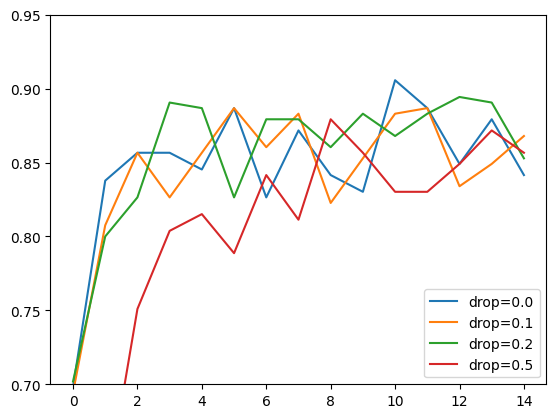

In [109]:
for drop, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('drop=%s' % drop))
    
plt.ylim(0.7, 0.95)
plt.legend()

We don't need dropout

## Ajusting agumentarion

First thing to do is try values that I have got before

In [111]:
learning_rate = 0.001 
epochs=30
size1=128
size2=256
scores = {}

for aug in ['Yes', 'No']:
    print('AUG=',aug)
    if not aug:
        train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False)
    else:
        train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True )
        
    model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)
    
    history = model.fit(train_dataset,
                        epochs=epochs,
                        steps_per_epoch=len(train_dataset),
                        validation_data=valid_dataset,
                        validation_steps=len(valid_dataset),
                        callbacks=[chechpoint] )   
    
    scores[aug]=history.history 
    print()
    print()


AUG= Yes
Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/30
239/239 [==============================] - 34s 138ms/step - loss: 2.4656 - accuracy: 0.3304 - val_loss: 1.2714 - val_accuracy: 0.6189
Epoch 2/30
239/239 [==============================] - 33s 138ms/step - loss: 1.3818 - accuracy: 0.6040 - val_loss: 0.9045 - val_accuracy: 0.7396
Epoch 3/30
239/239 [==============================] - 34s 141ms/step - loss: 1.0352 - accuracy: 0.6899 - val_loss: 0.7473 - val_accuracy: 0.7811
Epoch 4/30
239/239 [==============================] - 33s 139ms/step - loss: 0.8615 - accuracy: 0.7404 - val_loss: 0.6370 - val_accuracy: 0.8075
Epoch 5/30
239/239 [==============================] - 33s 137ms/step - loss: 0.7508 - accuracy: 0.7733 - val_loss: 0.5886 - val_accuracy: 0.8189
Epoch 6/30
239/239 [==============================] - 33s 138ms/step - loss: 0.6589 - accuracy: 0.7939 - val_loss: 0.5887 - val_accuracy: 0

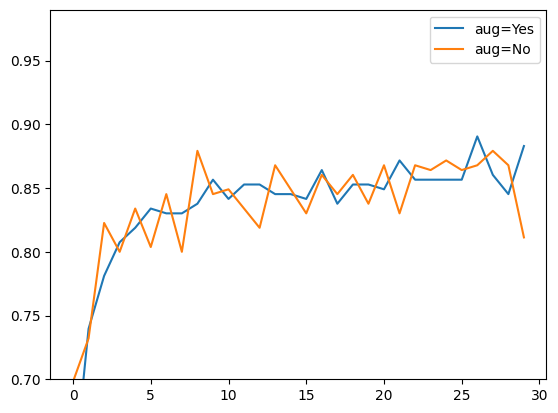

In [112]:
for aug, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('aug=%s' % aug))
    
plt.ylim(0.7, 0.99)
plt.legend()

## Epermients with augmentation

In [113]:
old_s=scores['Yes']

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/30
239/239 [==============================] - 37s 150ms/step - loss: 3.0412 - accuracy: 0.1608 - val_loss: 2.1342 - val_accuracy: 0.2792
Epoch 2/30
239/239 [==============================] - 36s 150ms/step - loss: 2.2836 - accuracy: 0.2977 - val_loss: 1.6023 - val_accuracy: 0.4830
Epoch 3/30
239/239 [==============================] - 36s 149ms/step - loss: 2.0518 - accuracy: 0.3721 - val_loss: 1.4311 - val_accuracy: 0.5245
Epoch 4/30
239/239 [==============================] - 36s 148ms/step - loss: 1.9533 - accuracy: 0.4111 - val_loss: 1.3146 - val_accuracy: 0.5925
Epoch 5/30
239/239 [==============================] - 36s 151ms/step - loss: 1.8105 - accuracy: 0.4441 - val_loss: 1.3977 - val_accuracy: 0.5170
Epoch 6/30
239/239 [==============================] - 37s 154ms/step - loss: 1.7691 - accuracy: 0.4582 - val_loss: 1.3042 - val_accuracy: 0.5887
Epo

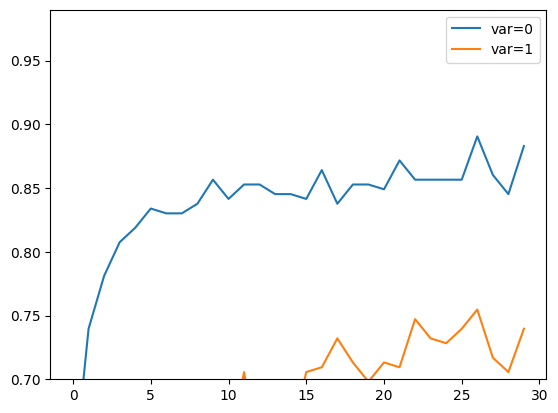

In [115]:
learning_rate = 0.001 
epochs=30
size1=128
size2=256
scores = {}
scores[0]=old_s

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                rotation_range=25,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.05,
                zoom_range=0.25,
                horizontal_flip=False,
                vertical_flip=True )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[1]=history.history 
print()
print()

for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

In [ ]:
for rotation_range, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('rotation_range=%s' % rotation_range))
    
plt.ylim(0.7, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/15
239/239 [==============================] - 35s 144ms/step - loss: 2.7607 - accuracy: 0.2382 - val_loss: 1.5485 - val_accuracy: 0.5057
Epoch 2/15
239/239 [==============================] - 35s 144ms/step - loss: 1.8308 - accuracy: 0.4566 - val_loss: 1.2444 - val_accuracy: 0.6038
Epoch 3/15
239/239 [==============================] - 35s 144ms/step - loss: 1.5829 - accuracy: 0.5346 - val_loss: 0.9929 - val_accuracy: 0.6981
Epoch 4/15
239/239 [==============================] - 35s 145ms/step - loss: 1.4146 - accuracy: 0.5860 - val_loss: 1.0061 - val_accuracy: 0.6943
Epoch 5/15
239/239 [==============================] - 34s 143ms/step - loss: 1.2750 - accuracy: 0.6207 - val_loss: 0.8029 - val_accuracy: 0.7547
Epoch 6/15
239/239 [==============================] - 35s 144ms/step - loss: 1.2062 - accuracy: 0.6405 - val_loss: 0.7982 - val_accuracy: 0.7585
Epo

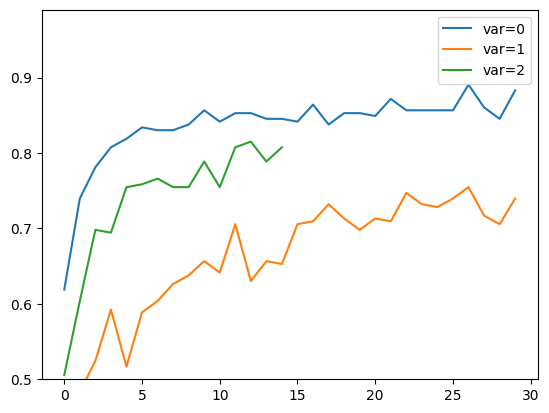

In [116]:
learning_rate = 0.001 
epochs=15
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.15,
                        height_shift_range=0.15,
                        shear_range=0.1,
                        zoom_range=0,
                        horizontal_flip=False,
                        vertical_flip=True  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[2]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

In [117]:
history2 = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

Epoch 1/15
239/239 [==============================] - 35s 144ms/step - loss: 0.8460 - accuracy: 0.7433 - val_loss: 0.6565 - val_accuracy: 0.8075
Epoch 2/15
239/239 [==============================] - 37s 153ms/step - loss: 0.8234 - accuracy: 0.7476 - val_loss: 0.6589 - val_accuracy: 0.7887
Epoch 3/15
239/239 [==============================] - 35s 147ms/step - loss: 0.8306 - accuracy: 0.7493 - val_loss: 0.6557 - val_accuracy: 0.8075
Epoch 4/15
239/239 [==============================] - 35s 146ms/step - loss: 0.7886 - accuracy: 0.7598 - val_loss: 0.5676 - val_accuracy: 0.8377
Epoch 5/15
239/239 [==============================] - 35s 145ms/step - loss: 0.7859 - accuracy: 0.7539 - val_loss: 0.6991 - val_accuracy: 0.7962
Epoch 6/15
239/239 [==============================] - 35s 147ms/step - loss: 0.7759 - accuracy: 0.7625 - val_loss: 0.6219 - val_accuracy: 0.8302
Epoch 7/15
239/239 [==============================] - 35s 145ms/step - loss: 0.7422 - accuracy: 0.7743 - val_loss: 0.5808 - val_ac

In [119]:
history2.history

{'loss': [0.846036434173584,
  0.8234341740608215,
  0.830597460269928,
  0.7886063456535339,
  0.7859131097793579,
  0.7759233713150024,
  0.742222785949707,
  0.7785530686378479,
  0.7201679348945618,
  0.7294923067092896,
  0.6912264227867126,
  0.6889376044273376,
  0.689471423625946,
  0.6682640910148621,
  0.6470814347267151],
 'accuracy': [0.7433105707168579,
  0.7476390600204468,
  0.7493441700935364,
  0.7598373293876648,
  0.753934919834137,
  0.7624606490135193,
  0.774265468120575,
  0.7576075792312622,
  0.7804301977157593,
  0.7757083177566528,
  0.7875131368637085,
  0.7842339873313904,
  0.7859391570091248,
  0.7944648265838623,
  0.7957764863967896],
 'val_loss': [0.6565174460411072,
  0.6588529944419861,
  0.6556859016418457,
  0.5676449537277222,
  0.699120819568634,
  0.6219443678855896,
  0.5808137655258179,
  0.6823192834854126,
  0.595637857913971,
  0.6748145818710327,
  0.6563379168510437,
  0.6370778679847717,
  0.6547253727912903,
  0.6725385785102844,
  0.61

In [120]:
scores[2]['loss']+=history2.history['loss']
scores[2]['accuracy']+=history2.history['accuracy']
scores[2]['val_loss']+=history2.history['val_loss']
scores[2]['val_accuracy']+=history2.history['val_accuracy']

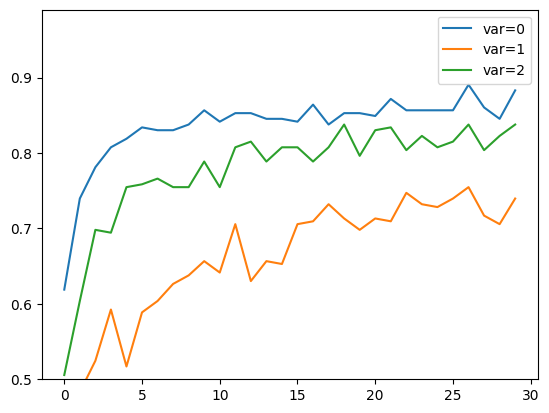

In [121]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.5498 - accuracy: 0.3033 - val_loss: 1.3091 - val_accuracy: 0.6226
Epoch 2/20
239/239 [==============================] - 34s 144ms/step - loss: 1.4142 - accuracy: 0.5937 - val_loss: 0.8316 - val_accuracy: 0.7321
Epoch 3/20
239/239 [==============================] - 35s 148ms/step - loss: 1.0885 - accuracy: 0.6798 - val_loss: 0.6309 - val_accuracy: 0.8075
Epoch 4/20
239/239 [==============================] - 35s 144ms/step - loss: 0.8907 - accuracy: 0.7345 - val_loss: 0.5778 - val_accuracy: 0.8264
Epoch 5/20
239/239 [==============================] - 35s 144ms/step - loss: 0.7933 - accuracy: 0.7566 - val_loss: 0.5363 - val_accuracy: 0.8151
Epoch 6/20
239/239 [==============================] - 35s 147ms/step - loss: 0.6920 - accuracy: 0.7901 - val_loss: 0.4768 - val_accuracy: 0.8453
Epo

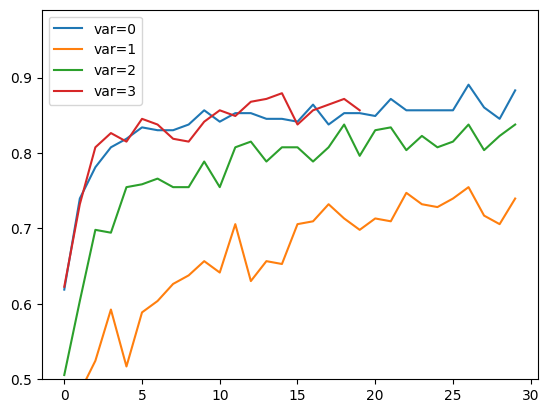

In [122]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.10,
                        height_shift_range=0.10,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[3]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 145ms/step - loss: 2.6916 - accuracy: 0.2694 - val_loss: 1.3549 - val_accuracy: 0.6000
Epoch 2/20
239/239 [==============================] - 35s 147ms/step - loss: 1.5868 - accuracy: 0.5405 - val_loss: 0.9088 - val_accuracy: 0.7094
Epoch 3/20
239/239 [==============================] - 35s 147ms/step - loss: 1.2935 - accuracy: 0.6186 - val_loss: 0.6624 - val_accuracy: 0.8113
Epoch 4/20
239/239 [==============================] - 35s 148ms/step - loss: 1.1162 - accuracy: 0.6695 - val_loss: 0.6121 - val_accuracy: 0.8113
Epoch 5/20
239/239 [==============================] - 35s 146ms/step - loss: 0.9815 - accuracy: 0.7049 - val_loss: 0.6613 - val_accuracy: 0.7962
Epoch 6/20
239/239 [==============================] - 35s 144ms/step - loss: 0.9049 - accuracy: 0.7243 - val_loss: 0.6284 - val_accuracy: 0.8113
Epo

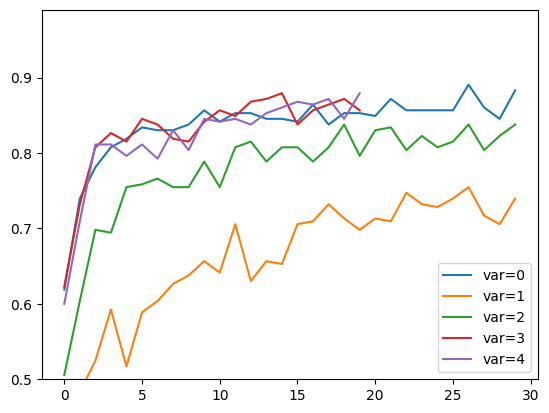

In [124]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=20,
                        width_shift_range=0.10,
                        height_shift_range=0.10,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[4]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/30
239/239 [==============================] - 36s 146ms/step - loss: 2.5802 - accuracy: 0.3071 - val_loss: 1.2443 - val_accuracy: 0.6340
Epoch 2/30
239/239 [==============================] - 35s 145ms/step - loss: 1.5066 - accuracy: 0.5630 - val_loss: 0.8839 - val_accuracy: 0.7208
Epoch 3/30
239/239 [==============================] - 34s 143ms/step - loss: 1.2113 - accuracy: 0.6498 - val_loss: 0.6711 - val_accuracy: 0.8151
Epoch 4/30
239/239 [==============================] - 34s 142ms/step - loss: 1.0386 - accuracy: 0.6932 - val_loss: 0.6972 - val_accuracy: 0.7962
Epoch 5/30
239/239 [==============================] - 34s 142ms/step - loss: 0.9235 - accuracy: 0.7240 - val_loss: 0.6230 - val_accuracy: 0.8189
Epoch 6/30
239/239 [==============================] - 35s 144ms/step - loss: 0.8396 - accuracy: 0.7465 - val_loss: 0.5791 - val_accuracy: 0.8302
Epo

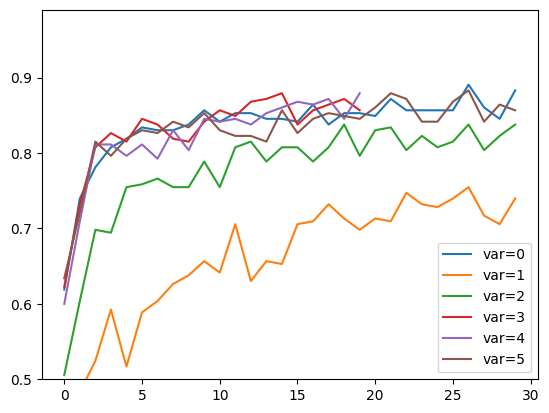

In [125]:
learning_rate = 0.001 
epochs=30
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=15,
                        width_shift_range=0.10,
                        height_shift_range=0.10,
                        shear_range=0,
                        zoom_range=0.15,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[5]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

In [126]:
del scores[5]

In [127]:
del scores[4]

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.6304 - accuracy: 0.2795 - val_loss: 1.3333 - val_accuracy: 0.5585
Epoch 2/20
239/239 [==============================] - 36s 150ms/step - loss: 1.6355 - accuracy: 0.5286 - val_loss: 0.8463 - val_accuracy: 0.7698
Epoch 3/20
239/239 [==============================] - 36s 150ms/step - loss: 1.3529 - accuracy: 0.6023 - val_loss: 0.8384 - val_accuracy: 0.7547
Epoch 4/20
239/239 [==============================] - 35s 147ms/step - loss: 1.1835 - accuracy: 0.6472 - val_loss: 0.7687 - val_accuracy: 0.7774
Epoch 5/20
239/239 [==============================] - 36s 148ms/step - loss: 1.0184 - accuracy: 0.6991 - val_loss: 0.6623 - val_accuracy: 0.8038
Epoch 6/20
239/239 [==============================] - 36s 151ms/step - loss: 0.9305 - accuracy: 0.7160 - val_loss: 0.5879 - val_accuracy: 0.8151
Epo

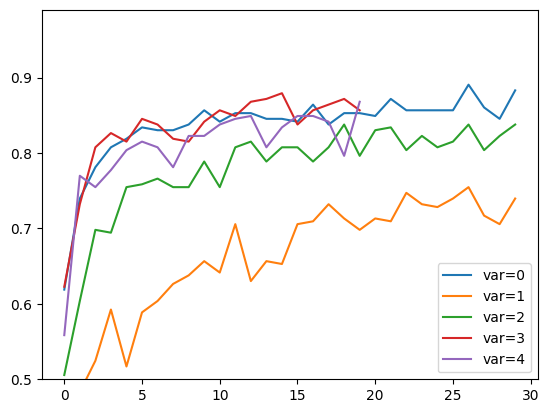

In [128]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=10,
                        width_shift_range=0.15,
                        height_shift_range=0.15,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[4]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 35s 144ms/step - loss: 2.5056 - accuracy: 0.3107 - val_loss: 1.1835 - val_accuracy: 0.6340
Epoch 2/20
239/239 [==============================] - 35s 145ms/step - loss: 1.4303 - accuracy: 0.5834 - val_loss: 0.7933 - val_accuracy: 0.7774
Epoch 3/20
239/239 [==============================] - 35s 144ms/step - loss: 1.0641 - accuracy: 0.6794 - val_loss: 0.6026 - val_accuracy: 0.7962
Epoch 4/20
239/239 [==============================] - 34s 144ms/step - loss: 0.8650 - accuracy: 0.7358 - val_loss: 0.5854 - val_accuracy: 0.8302
Epoch 5/20
239/239 [==============================] - 35s 145ms/step - loss: 0.7801 - accuracy: 0.7681 - val_loss: 0.6675 - val_accuracy: 0.8038
Epoch 6/20
239/239 [==============================] - 34s 142ms/step - loss: 0.6798 - accuracy: 0.7890 - val_loss: 0.5955 - val_accuracy: 0.8264
Epo

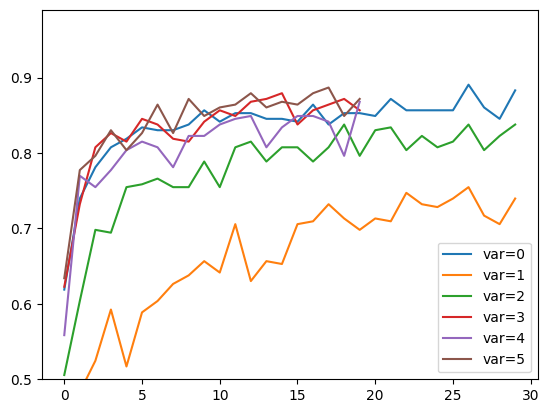

In [129]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[5]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.5, 0.99)
plt.legend()

In [130]:
del scores[1]
del scores[2]
del scores[4]



Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 35s 144ms/step - loss: 2.4911 - accuracy: 0.3227 - val_loss: 1.2129 - val_accuracy: 0.6415
Epoch 2/20
239/239 [==============================] - 35s 145ms/step - loss: 1.4276 - accuracy: 0.5902 - val_loss: 0.8420 - val_accuracy: 0.7245
Epoch 3/20
239/239 [==============================] - 35s 145ms/step - loss: 1.1388 - accuracy: 0.6654 - val_loss: 0.6572 - val_accuracy: 0.8189
Epoch 4/20
239/239 [==============================] - 35s 145ms/step - loss: 0.9650 - accuracy: 0.7137 - val_loss: 0.5509 - val_accuracy: 0.8453
Epoch 5/20
239/239 [==============================] - 35s 144ms/step - loss: 0.8411 - accuracy: 0.7490 - val_loss: 0.5361 - val_accuracy: 0.8415
Epoch 6/20
239/239 [==============================] - 35s 144ms/step - loss: 0.7342 - accuracy: 0.7768 - val_loss: 0.5963 - val_accuracy: 0.8226
Epo

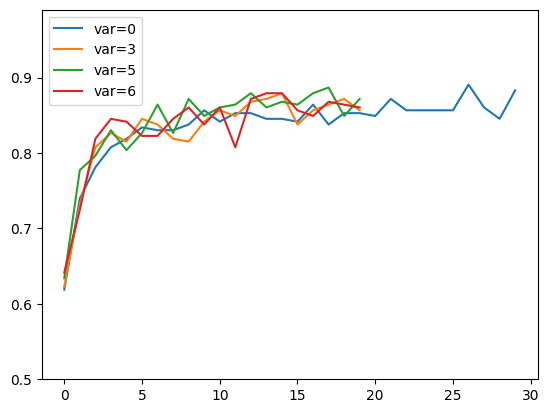

In [131]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0,
                        zoom_range=0.2,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[6]=history.history 
print()
print()




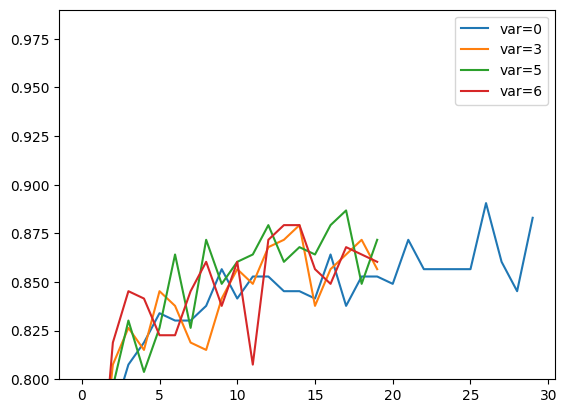

In [132]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.8, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.4780 - accuracy: 0.3165 - val_loss: 1.2409 - val_accuracy: 0.6151
Epoch 2/20
239/239 [==============================] - 35s 145ms/step - loss: 1.3850 - accuracy: 0.5927 - val_loss: 0.7236 - val_accuracy: 0.7736
Epoch 3/20
239/239 [==============================] - 35s 146ms/step - loss: 1.0194 - accuracy: 0.7042 - val_loss: 0.7621 - val_accuracy: 0.7774
Epoch 4/20
239/239 [==============================] - 35s 147ms/step - loss: 0.8486 - accuracy: 0.7411 - val_loss: 0.6619 - val_accuracy: 0.8377
Epoch 5/20
239/239 [==============================] - 35s 146ms/step - loss: 0.7047 - accuracy: 0.7832 - val_loss: 0.5647 - val_accuracy: 0.8113
Epoch 6/20
239/239 [==============================] - 35s 147ms/step - loss: 0.6058 - accuracy: 0.8124 - val_loss: 0.4891 - val_accuracy: 0.8642
Epo

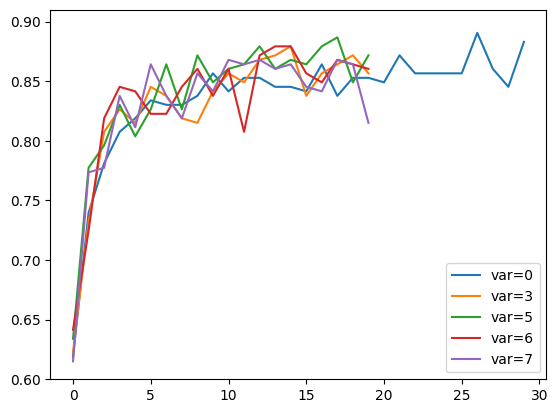

In [133]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=0,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[7]=history.history 
print()
print()

for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.6, 0.91)
plt.legend()

In [134]:
del scores[6]
del scores[7]

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.6070 - accuracy: 0.2888 - val_loss: 1.2669 - val_accuracy: 0.6113
Epoch 2/20
239/239 [==============================] - 34s 143ms/step - loss: 1.4075 - accuracy: 0.5933 - val_loss: 0.8256 - val_accuracy: 0.7396
Epoch 3/20
239/239 [==============================] - 35s 146ms/step - loss: 1.0647 - accuracy: 0.6860 - val_loss: 0.7288 - val_accuracy: 0.7811
Epoch 4/20
239/239 [==============================] - 35s 145ms/step - loss: 0.8627 - accuracy: 0.7462 - val_loss: 0.5802 - val_accuracy: 0.8226
Epoch 5/20
239/239 [==============================] - 35s 147ms/step - loss: 0.7641 - accuracy: 0.7643 - val_loss: 0.6567 - val_accuracy: 0.7849
Epoch 6/20
239/239 [==============================] - 35s 147ms/step - loss: 0.6541 - accuracy: 0.7964 - val_loss: 0.5885 - val_accuracy: 0.8151
Epo

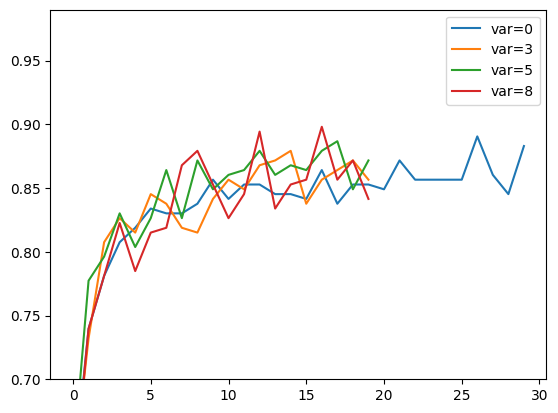

In [135]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[8]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/20
239/239 [==============================] - 36s 147ms/step - loss: 2.5940 - accuracy: 0.2895 - val_loss: 1.4041 - val_accuracy: 0.5434
Epoch 2/20
239/239 [==============================] - 34s 144ms/step - loss: 1.6004 - accuracy: 0.5374 - val_loss: 0.9454 - val_accuracy: 0.7283
Epoch 3/20
239/239 [==============================] - 35s 144ms/step - loss: 1.2898 - accuracy: 0.6212 - val_loss: 0.8222 - val_accuracy: 0.7434
Epoch 4/20
239/239 [==============================] - 35s 144ms/step - loss: 1.1314 - accuracy: 0.6640 - val_loss: 0.8309 - val_accuracy: 0.7358
Epoch 5/20
239/239 [==============================] - 35s 145ms/step - loss: 1.0152 - accuracy: 0.6923 - val_loss: 0.7088 - val_accuracy: 0.7736
Epoch 6/20
239/239 [==============================] - 35s 145ms/step - loss: 0.9178 - accuracy: 0.7185 - val_loss: 0.6174 - val_accuracy: 0.8038
Epo

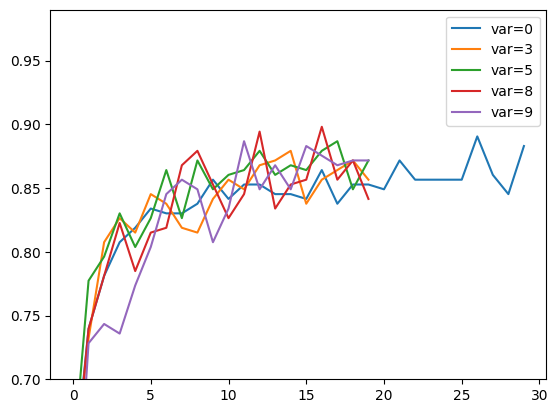

In [136]:
learning_rate = 0.001 
epochs=20
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=True  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores[9]=history.history 
print()
print()


for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

## Final test

ok i will take the best with aug, no dropout  (1)
plus best without aug, and dropout=0.2  (2)
plus best with aug and dropout=0.2      (3)

train for 50 epoches and choose the best



In [137]:
scores={}

In [139]:
learning_rate = 0.001 
epochs=50
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=None)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores['1 - aug, no dropout']=history.history 
print()
print()



train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False, )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=0.2)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores['2 - no aug, dropout']=history.history 
print()
print()


train_dataset, valid_dataset, test_dataset=datasets_v2(aug=True,
                        rotation_range=5,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        shear_range=0.1,
                        zoom_range=0.1,
                        horizontal_flip=False,
                        vertical_flip=False  )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=0.2)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores['3 - aug, dropout']=history.history 
print()
print()





Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/50
239/239 [==============================] - 36s 145ms/step - loss: 2.4834 - accuracy: 0.3185 - val_loss: 1.2155 - val_accuracy: 0.6038
Epoch 2/50
239/239 [==============================] - 36s 151ms/step - loss: 1.3734 - accuracy: 0.6018 - val_loss: 0.7592 - val_accuracy: 0.7698
Epoch 3/50
239/239 [==============================] - 35s 147ms/step - loss: 1.0429 - accuracy: 0.6906 - val_loss: 0.6191 - val_accuracy: 0.8189
Epoch 4/50
239/239 [==============================] - 35s 146ms/step - loss: 0.8642 - accuracy: 0.7444 - val_loss: 0.5419 - val_accuracy: 0.8340
Epoch 5/50
239/239 [==============================] - 36s 150ms/step - loss: 0.7352 - accuracy: 0.7775 - val_loss: 0.5865 - val_accuracy: 0.8000
Epoch 6/50
239/239 [==============================] - 35s 147ms/step - loss: 0.6625 - accuracy: 0.7977 - val_loss: 0.5850 - val_accuracy: 0.8302
Epo

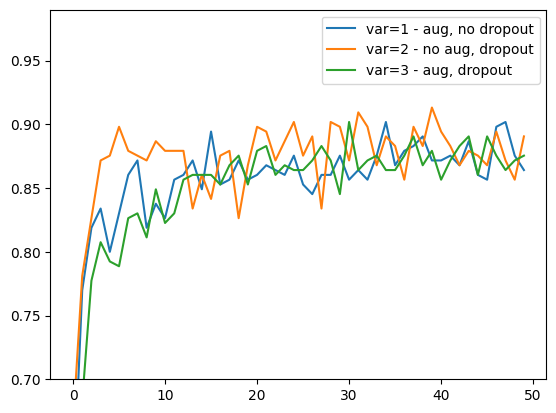

In [140]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.7, 0.99)
plt.legend()

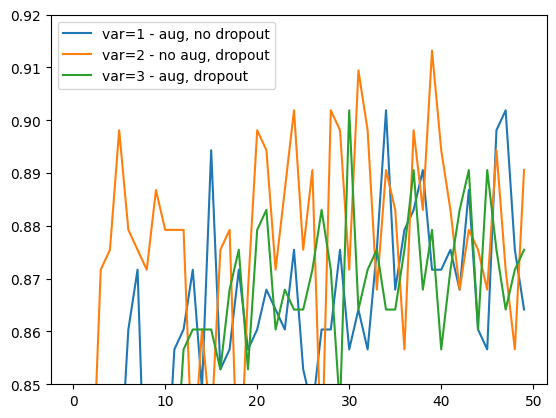

In [141]:
for var, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('var=%s' % var))
    
plt.ylim(0.85, 0.92)
plt.legend()

## The winner


The best model is with this params:

lets run the training for 100 epoches

In [142]:

learning_rate = 0.001 
epochs=100
size1=128
size2=256

train_dataset, valid_dataset, test_dataset=datasets_v2(aug=False, )

model=make_model_v2(learning_rate=learning_rate, size1=size1, size2=size2,droprate=0.2)

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=len(train_dataset),
                    validation_data=valid_dataset,
                    validation_steps=len(valid_dataset),
                    callbacks=[chechpoint] )   

scores_best=history.history 

print()
print()


Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Epoch 1/100
239/239 [==============================] - 25s 99ms/step - loss: 2.4438 - accuracy: 0.3324 - val_loss: 1.0799 - val_accuracy: 0.6566
Epoch 2/100
239/239 [==============================] - 24s 99ms/step - loss: 1.0965 - accuracy: 0.6730 - val_loss: 0.7717 - val_accuracy: 0.7396
Epoch 3/100
239/239 [==============================] - 24s 99ms/step - loss: 0.6540 - accuracy: 0.8025 - val_loss: 0.5456 - val_accuracy: 0.8264
Epoch 4/100
239/239 [==============================] - 24s 99ms/step - loss: 0.4177 - accuracy: 0.8659 - val_loss: 0.5271 - val_accuracy: 0.8528
Epoch 5/100
239/239 [==============================] - 24s 99ms/step - loss: 0.2686 - accuracy: 0.9197 - val_loss: 0.4855 - val_accuracy: 0.8566
Epoch 6/100
239/239 [==============================] - 54s 225ms/step - loss: 0.1852 - accuracy: 0.9425 - val_loss: 0.5723 - val_accuracy: 0.8340
Ep

In [146]:
scores_best.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

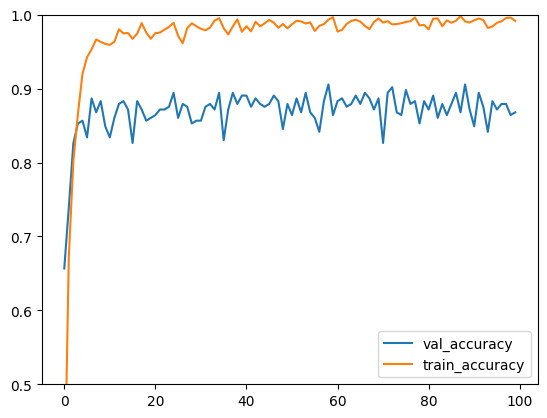

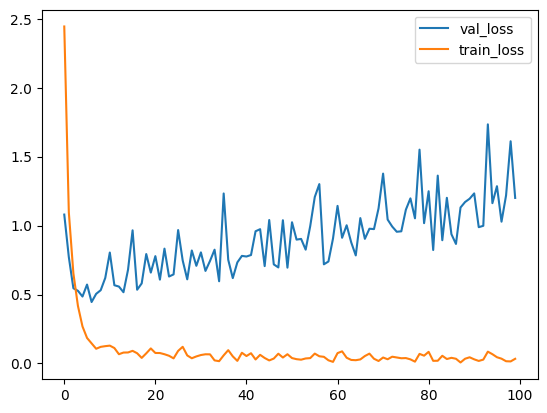

In [148]:
plt.figure()
plt.plot(scores_best['val_accuracy'], label=('val_accuracy'))
plt.plot(scores_best['accuracy'], label=('train_accuracy'))
plt.ylim(0.5, 1)
plt.legend()

plt.figure()
plt.plot(scores_best['val_loss'], label=('val_loss'))
plt.plot(scores_best['loss'], label=('train_loss'))
# plt.ylim(0.5, 0.95)
plt.legend()


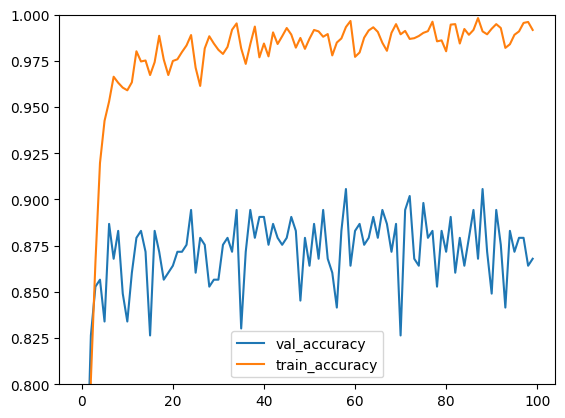

In [149]:
plt.figure()
plt.plot(scores_best['val_accuracy'], label=('val_accuracy'))
plt.plot(scores_best['accuracy'], label=('train_accuracy'))
plt.ylim(0.8, 1)
plt.legend()

# Conclusions

The best model i have got is cardmodel_v2_40_0.913.h5
with validation accuracy 0.913

In [151]:
model.evaluate(test_dataset)    #this is not the very best model, but the latest

9/9 [==============================] - 1s 86ms/step - loss: 2.3526 - accuracy: 0.8075


[2.3526315689086914, 0.8075471520423889]

Follow next files in README to see next steps in the project